# https://nasa-openscapes.github.io/earthdata-cloud-cookbook/discovery/Navigate_CMR_STAC.html

- https://nasa-openscapes.github.io/earthdata-cloud-cookbook/discovery/Navigate_CMR_STAC.html

In [1]:
#! pip install scikit-image

In [2]:
import matplotlib.pyplot as plt


In [3]:
import requests as r
#import skimage
from skimage import io

In [4]:

stac = 'https://cmr.earthdata.nasa.gov/stac/' # CMR-STAC API Endpoint
stac_response = r.get(stac).json()            # Call the STAC API endpoint
for s in stac_response: print(s)

id
title
stac_version
type
description
links


In [5]:
print(f"You are now using the {stac_response['id']} API (STAC Version: {stac_response['stac_version']}). {stac_response['description']}")
print(f"There are {len(stac_response['links'])} STAC catalogs available in CMR.")

You are now using the stac API (STAC Version: 1.0.0). This is the landing page for CMR-STAC. Each provider link contains a STAC endpoint.
There are 49 STAC catalogs available in CMR.


In [6]:
stac_lp = [s for s in stac_response['links'] if 'LP' in s['title']]  # Search for only LP-specific catalogs

# LPCLOUD is the STAC catalog we will be using and exploring today
lp_cloud = r.get([s for s in stac_lp if s['title'] == 'LPCLOUD'][0]['href']).json()
for l in lp_cloud: print(f"{l}: {lp_cloud[l]}")

id: LPCLOUD
title: LPCLOUD
description: Root catalog for LPCLOUD
type: Catalog
stac_version: 1.0.0
links: [{'rel': 'self', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD', 'title': 'Provider catalog', 'type': 'application/json'}, {'rel': 'root', 'href': 'https://cmr.earthdata.nasa.gov/stac/', 'title': 'Root catalog', 'type': 'application/json'}, {'rel': 'collections', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections', 'title': 'Provider Collections', 'type': 'application/json'}, {'rel': 'search', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/search', 'title': 'Provider Item Search', 'type': 'application/geo+json', 'method': 'GET'}, {'rel': 'search', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/search', 'title': 'Provider Item Search', 'type': 'application/geo+json', 'method': 'POST'}, {'rel': 'conformance', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/conformance', 'title': 'Conformance Classes', 'type': 'application/geo+json'}, {'rel': 'ser

In [7]:
stac_response['links']

[{'rel': 'self',
  'href': 'https://cmr.earthdata.nasa.gov/stac/',
  'title': 'NASA CMR-STAC Root Catalog',
  'type': 'application/json'},
 {'rel': 'root',
  'href': 'https://cmr.earthdata.nasa.gov/stac/',
  'title': 'NASA CMR-STAC Root Catalog',
  'type': 'application/json'},
 {'rel': 'about',
  'href': 'https://wiki.earthdata.nasa.gov/display/ED/SpatioTemporal+Asset+Catalog+%2528CMR-STAC%2529+Documentation',
  'title': 'CMR-STAC Documentation',
  'type': 'application/json'},
 {'title': 'LARC_ASDC',
  'rel': 'child',
  'type': 'application/json',
  'href': 'https://cmr.earthdata.nasa.gov/stac/LARC_ASDC'},
 {'title': 'USGS_EROS',
  'rel': 'child',
  'type': 'application/json',
  'href': 'https://cmr.earthdata.nasa.gov/stac/USGS_EROS'},
 {'title': 'ESA',
  'rel': 'child',
  'type': 'application/json',
  'href': 'https://cmr.earthdata.nasa.gov/stac/ESA'},
 {'title': 'GHRC',
  'rel': 'child',
  'type': 'application/json',
  'href': 'https://cmr.earthdata.nasa.gov/stac/GHRC'},
 {'title': '

In [8]:
lp_links = lp_cloud['links']
for l in lp_links: 
    try: 
        print(f"{l['href']} is the {l['title']}")
    except:
        print(f"{l['href']}")       

https://cmr.earthdata.nasa.gov/stac/LPCLOUD is the Provider catalog
https://cmr.earthdata.nasa.gov/stac/ is the Root catalog
https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections is the Provider Collections
https://cmr.earthdata.nasa.gov/stac/LPCLOUD/search is the Provider Item Search
https://cmr.earthdata.nasa.gov/stac/LPCLOUD/search is the Provider Item Search
https://cmr.earthdata.nasa.gov/stac/LPCLOUD/conformance is the Conformance Classes
https://api.stacspec.org/v1.0.0-beta.1/openapi.yaml is the OpenAPI Doc
https://api.stacspec.org/v1.0.0-beta.1/index.html is the HTML documentation
https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ASTGTM.v003
https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSL30.v1.5
https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v1.5


In [9]:
lp_collections = [l['href'] for l in lp_links if l['rel'] == 'collections'][0]  # Set collections endpoint to variable
collections_response = r.get(f"{lp_collections}").json()                        # Call collections endpoint
print(f"This collection contains {collections_response['description']} ({len(collections_response['collections'])} available)")

This collection contains All collections provided by LPCLOUD (3 available)


In [10]:
collections = collections_response['collections']
collections[1]

{'id': 'HLSL30.v1.5',
 'stac_version': '1.0.0',
 'license': 'not-provided',
 'title': 'HLS Operational Land Imager Surface Reflectance and TOA Brightness Daily Global 30 m V1.5',
 'type': 'Collection',
 'description': 'PROVISIONAL - The Harmonized Landsat and Sentinel-2 (HLS) project provides consistent surface reflectance (SR) and top of atmosphere (TOA) brightness data from the Operational Land Imager (OLI) aboard the joint NASA/USGS Landsat 8 satellite and the Multi-Spectral Instrument (MSI) aboard Europe’s Copernicus Sentinel-2A and Sentinel-2B satellites. The combined measurement enables global observations of the land every 2–3 days at 30-meter (m) spatial resolution. The HLS project uses a set of algorithms to obtain seamless products from OLI and MSI that include atmospheric correction, cloud and cloud-shadow masking, spatial co-registration and common gridding, illumination and view angle normalization, and spectral bandpass adjustment. \r\n\r\nThe HLSL30 product provides 30-m

In [11]:
# Search available collections for HLS and print them out
hls_collections = [c for c in collections if 'HLS' in c['title']]
for h in hls_collections: print(f"{h['title']} has an ID (shortname) of: {h['id']}")

HLS Operational Land Imager Surface Reflectance and TOA Brightness Daily Global 30 m V1.5 has an ID (shortname) of: HLSL30.v1.5
HLS Sentinel-2 Multi-spectral Instrument Surface Reflectance Daily Global 30 m V1.5 has an ID (shortname) of: HLSS30.v1.5


In [12]:
s30 = [h for h in hls_collections if h['id'] == 'HLSS30.v1.5'][0]  # Grab HLSS30 collection
for s in s30['extent']: print(f"{s}: {s30['extent'][s]}")          # Check out the extent of this collection

spatial: {'bbox': [[-180, -90, 180, 90]]}
temporal: {'interval': [['2015-12-01T00:00:00.000Z', None]]}


In [13]:
print(f"HLS S30 Start Date is: {s30['extent']['temporal']['interval'][0][0]}")
s30_id = s30['id']

HLS S30 Start Date is: 2015-12-01T00:00:00.000Z


In [14]:
l30 = [h for h in hls_collections if h['id'] == 'HLSL30.v1.5'][0]     # Grab HLSL30 collection
for l in l30['extent']: print(f"{l}: {l30['extent'][l]}")             # Check out the extent of this collection
print(f"HLS L30 Start Date is: {l30['extent']['temporal']['interval'][0][0]}")
l30_id = l30['id']

spatial: {'bbox': [[-180, -90, 180, 90]]}
temporal: {'interval': [['2013-05-01T00:00:00.000Z', None]]}
HLS L30 Start Date is: 2013-05-01T00:00:00.000Z


In [15]:
# Below, go through all links in the collection and return the link containing the items endpoint
s30_items = [s['href'] for s in s30['links'] if s['rel'] == 'items'][0]  # Set items endpoint to variable
s30_items

'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v1.5/items'

In [16]:
s30_items_response = r.get(f"{s30_items}").json()                        # Call items endpoint
s30_item = s30_items_response['features'][0]                             # select first item (10 items returned by default)
s30_item

{'type': 'Feature',
 'id': 'HLS.S30.T37QGC.2016228T074942.v1.5',
 'stac_version': '1.0.0',
 'stac_extensions': ['https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
 'collection': 'HLSS30.v1.5',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[40.9214644, 19.7977138],
    [41.1664924, 20.7865637],
    [40.9210571, 20.789487],
    [40.9088686, 19.7978488],
    [40.9214644, 19.7977138]]]},
 'bbox': [40.908869, 19.797714, 41.166492, 20.789487],
 'links': [{'rel': 'self',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v1.5/items/HLS.S30.T37QGC.2016228T074942.v1.5'},
  {'rel': 'parent',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v1.5'},
  {'rel': 'collection',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v1.5'},
  {'rel': 'root', 'href': 'https://cmr.earthdata.nasa.gov/stac/'},
  {'rel': 'provider', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD'},
  {'rel': 'via',
   'href': 'https://

In [17]:
# Print metadata attributes from this observation
print(f"The ID for this item is: {s30_item['id']}")
print(f"It was acquired on: {s30_item['properties']['datetime']}")
print(f"over: {s30_item['bbox']} (Lower Left, Upper Right corner coordinates)")
print(f"It contains {len(s30_item['assets'])} assets")
print(f"and is {s30_item['properties']['eo:cloud_cover']}% cloudy.")

The ID for this item is: HLS.S30.T37QGC.2016228T074942.v1.5
It was acquired on: 2016-08-15T08:00:59.720Z
over: [40.908869, 19.797714, 41.166492, 20.789487] (Lower Left, Upper Right corner coordinates)
It contains 20 assets
and is 4% cloudy.


In [18]:
for i, s in enumerate(s30_items_response['features']):
    print(f"Item at index {i} is {s['properties']['eo:cloud_cover']}% cloudy.")

Item at index 0 is 4% cloudy.
Item at index 1 is 0% cloudy.
Item at index 2 is 64% cloudy.
Item at index 3 is 0% cloudy.
Item at index 4 is 39% cloudy.
Item at index 5 is 74% cloudy.
Item at index 6 is 100% cloudy.
Item at index 7 is 30% cloudy.
Item at index 8 is 67% cloudy.
Item at index 9 is 99% cloudy.


In [19]:
item_index = 3 # Indexing starts at 0 in Python, so here select the eighth item in the list at index 7

In [20]:
s30_item = s30_items_response['features'][item_index]  # Grab the next item in the list

print(f"The ID for this item is: {s30_item['id']}")
print(f"It was acquired on: {s30_item['properties']['datetime']}")
print(f"over: {s30_item['bbox']} (Lower Left, Upper Right corner coordinates)")
print(f"It contains {len(s30_item['assets'])} assets")
print(f"and is {s30_item['properties']['eo:cloud_cover']}% cloudy.")

The ID for this item is: HLS.S30.T38RKR.2016228T074942.v1.5
It was acquired on: 2016-08-15T08:00:59.720Z
over: [41.949663, 27.001719, 43.065343, 28.011816] (Lower Left, Upper Right corner coordinates)
It contains 20 assets
and is 0% cloudy.


In [21]:
print("The following assets are available for download:")
for a in s30_item['assets']: print(a)

The following assets are available for download:
B02
B09
VAA
B06
B8A
B03
SZA
B01
VZA
B07
B05
B08
SAA
Fmask
B12
B11
B10
B04
browse
metadata


In [22]:
s30_item['assets']['browse']

{'title': 'Download HLS.S30.T38RKR.2016228T074942.v1.5.jpg',
 'href': 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.015/HLS.S30.T38RKR.2016228T074942.v1.5.jpg',
 'type': 'image/jpeg'}

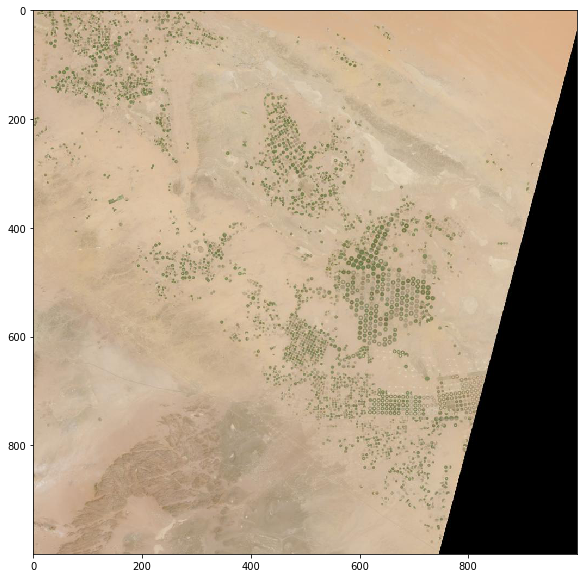

In [23]:
image = io.imread(s30_item['assets']['browse']['href'])  # Load jpg browse image into memory

# Basic plot of the image
plt.figure(figsize=(10,10))              
plt.imshow(image)
plt.show()